In [84]:
# 0.导入必要模块
from statsmodels.tsa.arima_model import ARMA
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
import calendar
from datetime import timedelta
import numpy as np

In [85]:
# 1.数据加载
origin_data = pd.read_csv("pollution.csv",usecols=["date","pollution"])

In [86]:
# 2.将时间作为df的索引
origin_data.Timestamp = pd.to_datetime(origin_data.date)
origin_data.index = origin_data.Timestamp

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [87]:
# 3.数据探索
origin_data.head()

,date,pollution
date,,
2010-01-02 00:00:00,2010-01-02 00:00:00,129.0
2010-01-02 01:00:00,2010-01-02 01:00:00,148.0
2010-01-02 02:00:00,2010-01-02 02:00:00,159.0
2010-01-02 03:00:00,2010-01-02 03:00:00,181.0
2010-01-02 04:00:00,2010-01-02 04:00:00,138.0


In [88]:
origin_data.shape

(43800, 2)

In [89]:
df_day = origin_data.resample('D').mean()
df_week = origin_data.resample('W').mean()
df_month = origin_data.resample('M').mean()
# print(df_day)

No handles with labels found to put in legend.


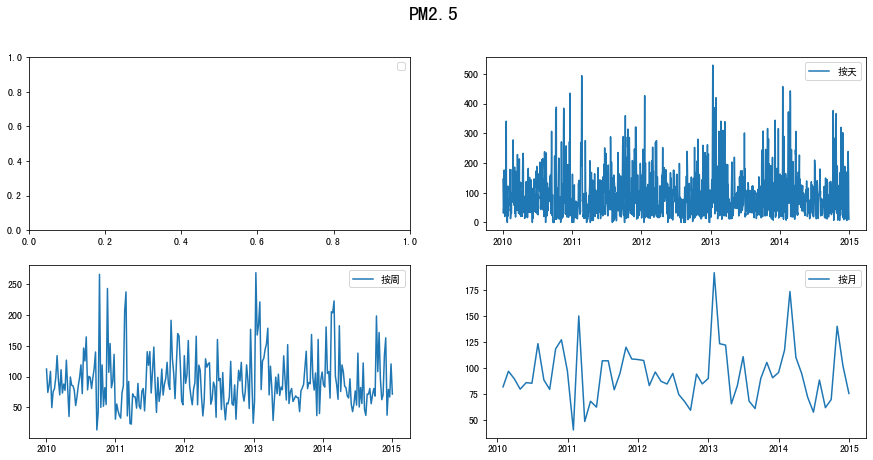

In [90]:
# 按照天，月，季度，年来显示沪市指数的走势
fig = plt.figure(figsize=[15, 7])
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.suptitle('PM2.5', fontsize=20)
plt.subplot(221)
# plt.plot(origin_data.date, '-', label='按小时')
plt.legend()
plt.subplot(222)
plt.plot(df_day, '-', label='按天')
plt.legend()
plt.subplot(223)
plt.plot(df_week, '-', label='按周')
plt.legend()
plt.subplot(224)
plt.plot(df_month, '-', label='按月')
plt.legend()
plt.show()

In [91]:
# 设置参数范围
ps = range(0, 3)
qs = range(0, 3)
parameters = product(ps, qs)
parameters_list = list(parameters)
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARMA(df_day.pollution,order=(param[0], param[1])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
print('最优模型: ', best_model.summary())


最优模型:                                ARMA Model Results                              
Dep. Variable:              pollution   No. Observations:                 1825
Model:                     ARMA(1, 1)   Log Likelihood              -10142.135
Method:                       css-mle   S.D. of innovations             62.694
Date:                Sun, 03 Jan 2021   AIC                          20292.270
Time:                        14:45:36   BIC                          20314.308
Sample:                    01-02-2010   HQIC                         20300.400
                         - 12-31-2014                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              94.0056      3.036     30.966      0.000      88.056      99.956
ar.L1.pollution     0.3745      0.037     10.212      0.000       0.303       0.446
ma.L1.pollution     0.294

In [92]:
# 设置future_month，需要预测的时间date_list
future_month = 3
last_month = pd.to_datetime(df_month.index[len(df_month)-1])
date_list = []
for i in range(future_month):
    # 计算下个月有多少天
    year = last_month.year
    month = last_month.month
    if month == 12:
        month = 1
        year = year+1
    else:
        month = month + 1
    next_month_days = calendar.monthrange(year, month)[1]
    #print(next_month_days)
    last_month = last_month + timedelta(days=next_month_days)
    date_list.append(last_month)
print('date_list=', date_list)


date_list= [Timestamp('2015-01-31 00:00:00', freq='M'), Timestamp('2015-02-28 00:00:00', freq='M'), Timestamp('2015-03-31 00:00:00', freq='M')]


In [93]:
# 设置future_month，需要预测的时间date_list
future_day = 90
last_day = pd.to_datetime(df_day.index[len(df_day)-1])
date_list = []
for i in range(future_day):
    # 计算下个月有多少天
    year = last_day.year
    month = last_day.month
    if month == 12:
        month = 1
        year = year+1
    else:
        month = month + 1
    next_days = calendar.monthrange(year, month)[1]
    #print(next_month_days)
    last_day = last_day + timedelta(days=1)
    date_list.append(last_day)
print('date_list=', date_list)


date_list= [Timestamp('2015-01-01 00:00:00', freq='D'), Timestamp('2015-01-02 00:00:00', freq='D'), Timestamp('2015-01-03 00:00:00', freq='D'), Timestamp('2015-01-04 00:00:00', freq='D'), Timestamp('2015-01-05 00:00:00', freq='D'), Timestamp('2015-01-06 00:00:00', freq='D'), Timestamp('2015-01-07 00:00:00', freq='D'), Timestamp('2015-01-08 00:00:00', freq='D'), Timestamp('2015-01-09 00:00:00', freq='D'), Timestamp('2015-01-10 00:00:00', freq='D'), Timestamp('2015-01-11 00:00:00', freq='D'), Timestamp('2015-01-12 00:00:00', freq='D'), Timestamp('2015-01-13 00:00:00', freq='D'), Timestamp('2015-01-14 00:00:00', freq='D'), Timestamp('2015-01-15 00:00:00', freq='D'), Timestamp('2015-01-16 00:00:00', freq='D'), Timestamp('2015-01-17 00:00:00', freq='D'), Timestamp('2015-01-18 00:00:00', freq='D'), Timestamp('2015-01-19 00:00:00', freq='D'), Timestamp('2015-01-20 00:00:00', freq='D'), Timestamp('2015-01-21 00:00:00', freq='D'), Timestamp('2015-01-22 00:00:00', freq='D'), Timestamp('2015-01-2

             pollution    forecast
2010-01-02  145.958333         NaN
2010-01-03   78.833333  123.523346
2010-01-04   31.333333   75.544066
2010-01-05   42.458333   57.548496
2010-01-06   56.416667   70.257754
...                ...         ...
2015-03-27         NaN   94.005550
2015-03-28         NaN   94.005550
2015-03-29         NaN   94.005550
2015-03-30         NaN   94.005550
2015-03-31         NaN   94.005550

[1915 rows x 2 columns]


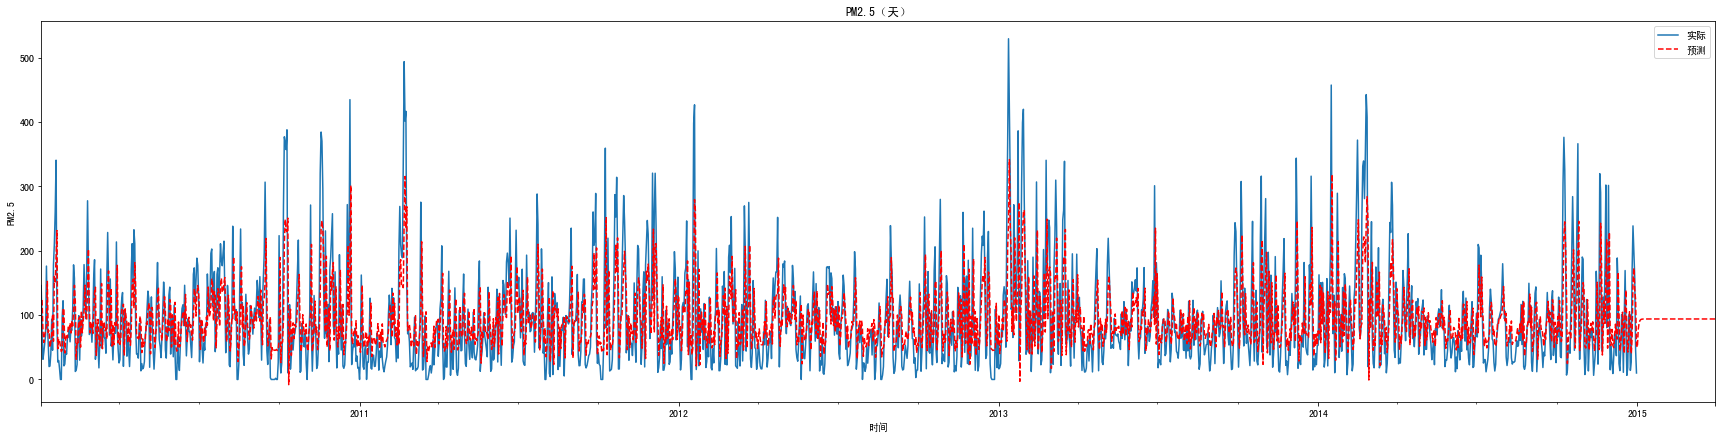

In [94]:
# 添加未来要预测的90天
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_day = pd.concat([df_day, future])
df_day['forecast'] = best_model.predict(start=0, end=len(df_day))
# 第一个元素不正确，设置为NaN
df_day['forecast'][0] = np.NaN
print(df_day)
# PM2.5预测结果显示
plt.figure(figsize=(30,7))
df_day.pollution.plot(label='实际')
df_day.forecast.plot(color='r', ls='--', label='预测')
plt.legend()
plt.title('PM2.5（天）')
plt.xlabel('时间')
plt.ylabel('PM2.5')
plt.show()
